In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
df_TelecomData = pd.read_csv(r'C:\Users\Keara\Downloads\Data Mining\TelecomChurnAnalysis\Telecom-Customer-Churn.csv')

In [3]:
df_pca = df_TelecomData

In [4]:
df_TelecomData.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df_TelecomData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
pd.to_numeric(df_TelecomData.TotalCharges,errors='coerce').isnull()
df_TelecomData[pd.to_numeric(df_TelecomData.TotalCharges,errors='coerce').isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [7]:
#Remove rows with space in TotalCharges
df_TelecomData = df_TelecomData[df_TelecomData.TotalCharges!=' ']
df_TelecomData.shape

(7032, 21)

In [8]:
df_TelecomData.TotalCharges = pd.to_numeric(df_TelecomData.TotalCharges)

C:\Users\Keara\anaconda3\lib\site-packages\pandas\core\generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [9]:
df_TelecomData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [10]:
df_pca = df_TelecomData

In [11]:
df_pca.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
df_pca.shape

(7032, 21)

In [13]:
pca_num = list(df_pca.loc[:,df_pca.dtypes!='object'].columns[0:-1])
len(pca_num)

3

In [14]:
pca_cat = list(df_pca.loc[:,df_pca.dtypes=='object'].columns)
len(pca_cat)

17

In [15]:
#standardization
from sklearn.preprocessing import StandardScaler

myscaler = StandardScaler()
myscaler = myscaler.fit(df_pca[pca_num])
df_pca[pca_num] = myscaler.transform(df_pca[pca_num])

from sklearn.preprocessing import MinMaxScaler

myscaler2 = MinMaxScaler()
myscaler2 = myscaler2.fit(df_pca[pca_num])
df_pca[pca_num] = myscaler2.transform(df_pca[pca_num])

df_pca[pca_num].mean()
df_pca[pca_num].min()
df_pca[pca_num].max()

SeniorCitizen     1.0
tenure            1.0
MonthlyCharges    1.0
dtype: float64

In [16]:
#dimensionality reduction with PCA
df_temp = pd.get_dummies(df_pca[pca_cat])

df_all = [df_pca[pca_num], df_temp]

df_data_pca = pd.concat(df_all, axis=1)

In [17]:
df_data_pca.head(5)

,SeniorCitizen,tenure,MonthlyCharges,customerID_0002-ORFBO,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,customerID_0013-SMEOE,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,0.0,0.000000,0.115423,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
1,0.0,0.464789,0.385075,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,1,1,0
2,0.0,0.014085,0.354229,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
3,0.0,0.619718,0.239303,0,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0,1,0
4,0.0,0.014085,0.521891,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1


In [24]:
from sklearn.decomposition import PCA

my_PCA = PCA(n_components=2) 
PCA_obj = my_PCA.fit(df_data_pca)

print(my_PCA.explained_variance_ratio_)
print(sum(my_PCA.explained_variance_ratio_))

[0.20942866 0.11894189]
0.3283705503734435


In [25]:
pca_features = my_PCA.transform(df_data_pca)

PCA_df = pd.DataFrame(data = pca_features, columns = ['pca1', 'pca2'])

In [26]:
PCA_df.shape

(7032, 2)

Text(0, 0.5, 'Second Principal Component')

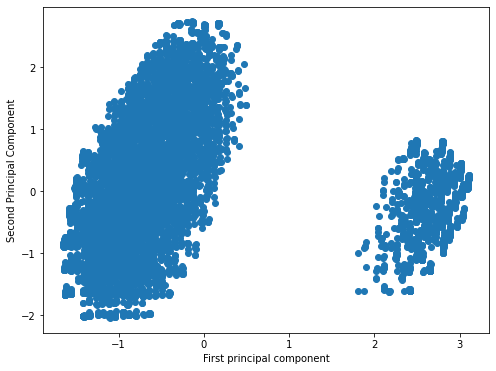

In [27]:
plt.figure(figsize=(8,6))
plt.scatter(PCA_df['pca1'],PCA_df['pca2'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')